<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2024-2/Sesiones/Sesion_12_Desicion_Tree_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Algoritmo CART (classification and regresion tree)

Se busca entrenar un modelo para categorizar la información encontrando la frontera de desición, permite tener una mejor interpretabilidad que las redes neuronales dado que se puede tener una represetancion grafica del proceso de desiscion secuencial.

-  https://www.nature.com/articles/nmeth.4370
- Ref https://www.youtube.com/watch?v=kqaLlte6P6o&ab_channel=CodificandoBits
- Hand on Machine leargning




In [ ]:
# referencias
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pylab as plt

Dado un conjunto de caracteristicas se establece una condición que realiza
una particion binaria de los datos a clasificar repitiendo hasta encontrar
particiones lo más homogenea posible.




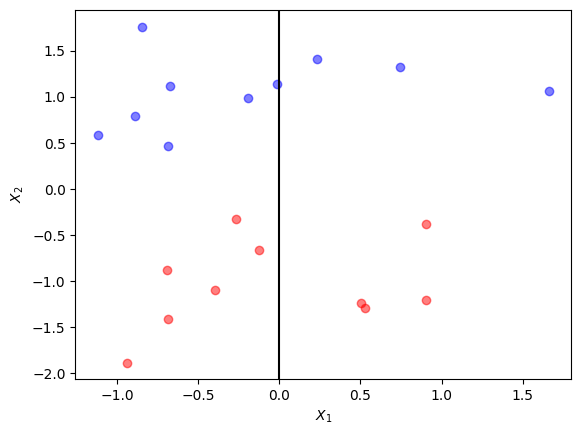

In [ ]:
X0, y0 = make_classification(n_samples=20,
    n_features=2, n_redundant=0, n_informative=1, random_state=1,
    n_clusters_per_class=1)

x=np.arange(-2, 3,1)
x_,y_ = np.meshgrid(x,x)

fig, ax = plt.subplots()
ax.plot(X0[:,0][y0==0],X0[:,1][y0==0],"ro", alpha=0.5)
ax.plot(X0[:,0][y0==1],X0[:,1][y0==1],"bo", alpha=0.5)
#ax.plot(x_,y_,"k.")

#ax.axvline(x = 1, color = 'm', label="x1<=1")
#ax.axhline(y = 0.2, color = 'y', label="x2<0.2")
ax.axvline(x = 0.0, color = 'k', label="x2<0.2")
#plt.legend(loc=3)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.savefig("3.png")


- Gini index

El índice o impureza de Gini en un árbol de decisión clasificador es una medida de la impureza o heterogeneidad de un nodo o una partición de datos.  El índice de Gini varía entre 0 y 1, donde 0 significa que el nodo o la partición es puro (todas las muestras pertenecen a una sola clase) y 1 significa que el nodo o la partición es impuro (las muestras están distribuidas uniformemente entre todas las clases).


La impureza de Gini mide la frecuencia con la que se clasifica incorrectamente un atributo elegido al azar. Cuando se evalúa usando la impureza de Gini, un valor más bajo es más ideal.


$G = 1 - (PC_1)^2 - (PC_2)^2$

$PC_1$: Probablidad categoria 1

$PC_2$: Probablidad categoria 2



- SI :

    - $G=0$ nodos puros, datos que pertenecen a una sola categoría

    - Gini > 0 son nodos con impurezas, con mas de una categoría


    La partición purpura  y amarilla del gráfico anterior representan nodos puros.

    Mientras que la linea negra define:

    - 7 puntos son de color azul.

    - 6 puntos de color rojo.

    $G = 1 - (7/13)^{2} - (6/13)^{2}$


    La ponderación viene dada por:


    $m = (7/20+7/20)=7/10$



- NO:

    - $G=1-(3/7)^{2}-(4/7)^{2}$


    - m = (3/20+4/20)


La funcion de coste, asocida al nodo padre:

$J(k, t_k) = \frac{m_{left}}{m} G_{left} + \frac{m_{right}}{m} G_{right} $



Entropía de Gini.

La entropía es un concepto que se deriva de la teoría de la información, que mide la impureza de los valores de la muestra.


$H=-\sum_{k=1\\ p_{ik!=0}}^{n} p_{ij}\log_2(p_{ik})$


Los valores de entropía pueden estar entre 0 y 1. Si todas las muestras en el conjunto de datos, S, pertenecen a una clase, entonces la entropía será igual a cero


# Algoritmo
1. Calcular todos los posibles condiciones.
2. Calcular los indices de Gini.
3. Encontrar la funcion de coste
4. Escoger la menor funcion de coste
5. Repetir.


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
import graphviz
#from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree


# Libraries for draw contours
def make_meshgrid(x, y, h=0.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


def plot_contoursExact(ax, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out



In [ ]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,\
                                                    test_size=0.33, random_state=42)

In [ ]:
DecisionTreeClassifier?

In [ ]:
clf = DecisionTreeClassifier(max_depth=100)
clf.fit(X_train, y_train)

print(f"{clf.score(X_test, y_test)} ")
print(f"{clf.score(X_train, y_train)}" )

0.98 
1.0


In [ ]:
tree.export_graphviz?
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html


In [ ]:
# save graph, put out_file with the name
arbol = tree.export_graphviz(clf, out_file=None,
                     class_names = iris.target_names,\
                    feature_names = iris.feature_names,\
                    impurity=False, filled=True)
!ls

3.png  sample_data


In [ ]:
tree.plot_tree?

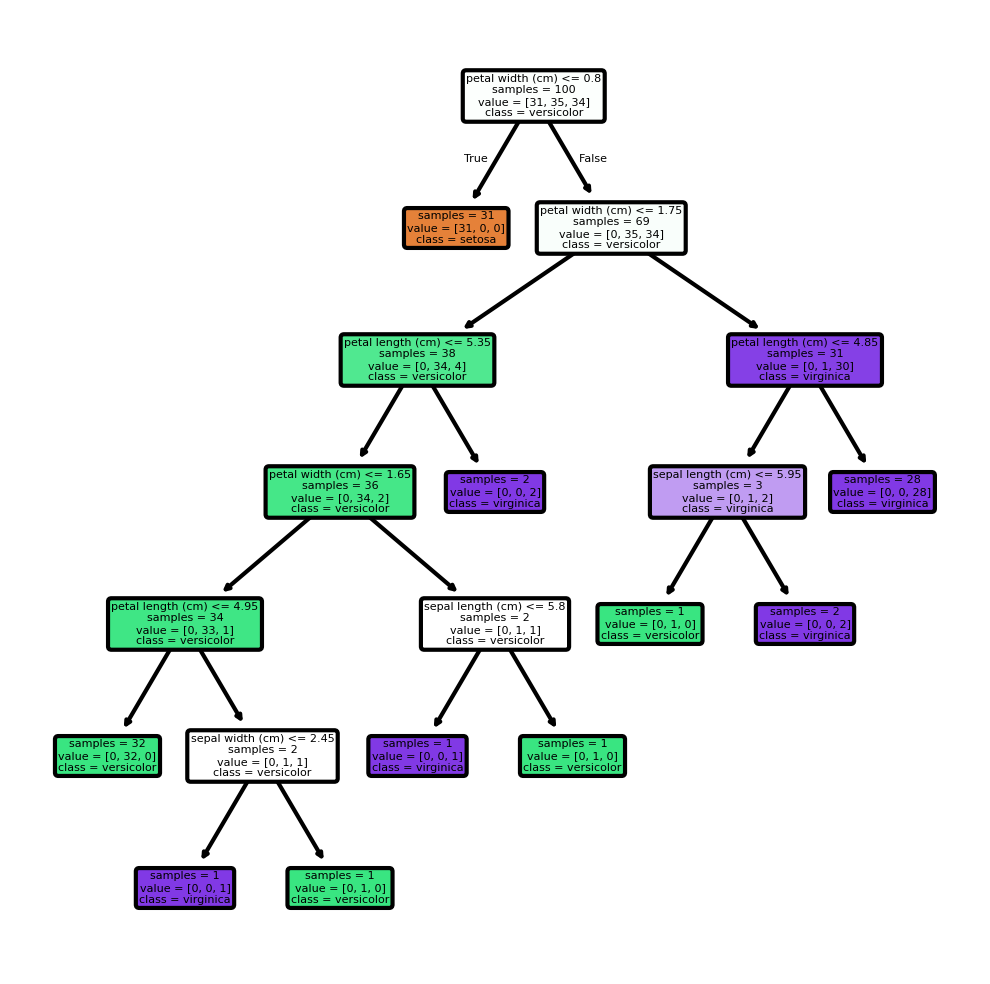

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
graph=tree.plot_tree(clf,class_names = iris.target_names,\
              feature_names = iris.feature_names,\
              impurity=False, filled=True,rounded=True )

# Importancia de las cacracteristicas

In [ ]:
clf.feature_importances_

array([0., 0., 0., 1.])

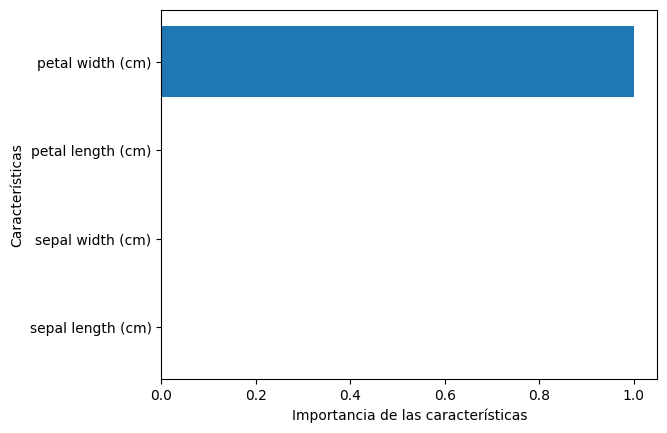

In [ ]:
caract = iris.data.shape[1]
plt.barh(range(caract), clf.feature_importances_)
plt.yticks(np.arange(caract),iris.feature_names)
plt.xlabel('Importancia de las características')
plt.ylabel('Características')
plt.show()

<ipython-input-14-a8391e8d2cf1>:50: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipython-input-14-a8391e8d2cf1>:50: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipython-input-14-a8391e8d2cf1>:50: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipython-input-14-a8391e8d2cf1>:50: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipython-input-14-a8391e8d2cf1>:50: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipyt

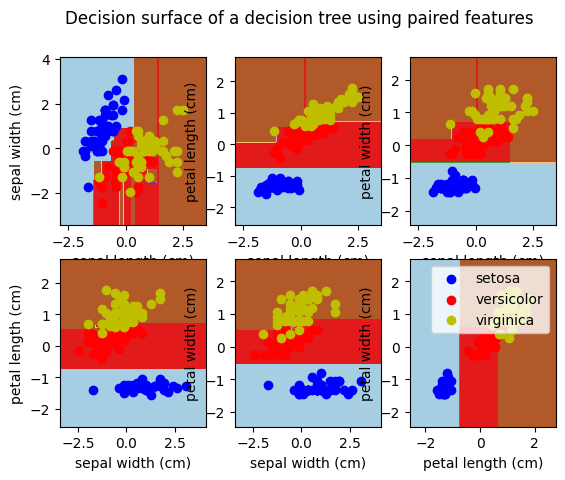

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# Parameters
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Shuffle
    idx = np.arange(X.shape[0])
    np.random.seed(13)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    # Standardize
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()